In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#Goal: To create a predictive model using Forbes data from 2013, 2015, 2017, 2020, 2021, and 2023 to see what companies will most likely be in the top 10 in 2024

In [3]:
#Initialize all datasets
df_global_2000_2013 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/forbes2013.csv")
df_global_2000_2015 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/Forbes2015.csv")
df_global_2000_2017 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/Forbes Top2000 2017.csv")
df_global_2000_2020 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/forbes_top_2000_world_largest_public_companies.csv")
df_global_2000_2021 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/fortune_2000_in_2021.csv")
#We are going to set aside this dataset for prediction later
df_global_2000_2023 = pd.read_csv("/Users/eshan/Downloads/ForbesTop2000DataSets/forbes_the_global_2000_2023update.csv")

In [4]:
#Cleaning up all datasets 
df_global_2000_2013 = df_global_2000_2013.sort_values(by = 'Rank') 
df_global_2000_2015 = df_global_2000_2015.sort_values(by = 'Rank')
column_to_move = df_global_2000_2015.pop('Rank')
df_global_2000_2015.insert(0, 'Rank', column_to_move)
df_global_2000_2017 = df_global_2000_2017.drop("Unnamed: 0", axis = 1)
df_global_2000_2020['rank'] = df_global_2000_2020['rank'].str.replace('#', '')
df_global_2000_2020.rename(columns={'rank': 'Rank'}, inplace=True)
df_global_2000_2023.rename(columns={'rank': 'Rank'}, inplace=True)
df_global_2000_2017.rename(columns={' Rank': 'Rank'}, inplace=True)

In [27]:
df_global_2000_2013.head(11)

,Rank,Company,Sales($billion),Profits($billion),Assets,Market Value,Country,top_10
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1
936,6,HSBC Holdings,104.9,14.3,2684.1,201.3,United Kingdom,1
529,7,Royal Dutch Shell,467.2,26.6,360.3,213.1,Netherlands,1
184,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8,China,1
185,9,PetroChina,308.9,18.3,347.8,261.2,China,1
1034,9,Berkshire Hathaway,162.5,14.8,427.5,252.8,United States,1


In [28]:
df_global_2000_2015.head(11)

,Rank,Company,Sector,Industry,Continent,Country,Market Value,Sales,Profits,Assets,Forbes Webpage,top_10
159,1,ICBC,Financials,Major Banks,Asia,China,215.6,148.7,42.7,3124.9,http://www.forbes.com/companies/icbc/,1
160,2,China Construction Bank,Financials,Regional Banks,Asia,China,174.4,121.3,34.2,2449.5,http://www.forbes.com/companies/china-construc...,1
161,3,Agricultural Bank of China,Financials,Regional Banks,Asia,China,141.1,136.4,27.0,2405.4,http://www.forbes.com/companies/agricultural-b...,1
1433,4,JPMorgan Chase,Financials,Major Banks,North America,United States,229.7,105.7,17.3,2435.3,http://www.forbes.com/companies/jpmorgan-chase/,1
1434,5,Berkshire Hathaway,Financials,Investment Services,North America,United States,309.1,178.8,19.5,493.4,http://www.forbes.com/companies/berkshire-hath...,1
1435,6,Exxon Mobil,Energy,Oil & Gas Operations,North America,United States,422.3,394.0,32.6,346.8,http://www.forbes.com/companies/exxon-mobil/,1
1436,7,General Electric,Industrials,Conglomerates,North America,United States,259.6,143.3,14.8,656.6,http://www.forbes.com/companies/general-electric/,1
1437,8,Wells Fargo,Financials,Major Banks,North America,United States,261.4,88.7,21.9,1543.0,http://www.forbes.com/companies/wells-fargo/,1
162,9,Bank of China,Financials,Major Banks,Asia,China,124.2,105.1,25.5,2291.8,http://www.forbes.com/companies/bank-of-china/,1
163,10,PetroChina,Energy,Oil & Gas Operations,Asia,China,202.0,328.5,21.1,386.9,http://www.forbes.com/companies/petrochina/,1


In [29]:
df_global_2000_2017.head(11)

,Rank,Company,Country,Sales,Profits,Assets,Market Value,Sector,Industry,top_10
0,1,ICBC,China,151.4,42.0,3473.2,229.8,Financials,Major Banks,1
1,2,China Construction Bank,China,134.2,35.0,3016.6,200.5,Financials,Regional Banks,1
2,3,Berkshire Hathaway,United States,222.9,24.1,620.9,409.9,Financials,Investment Services,1
3,4,JPMorgan Chase,United States,102.5,24.2,2513.0,306.6,Financials,Major Banks,1
4,5,Wells Fargo,United States,97.6,21.9,1943.4,274.4,Financials,Major Banks,1
5,6,Agricultural Bank of China,China,115.7,27.8,2816.0,149.2,Financials,Regional Banks,1
6,7,Bank of America,United States,92.2,16.6,2196.8,231.9,Financials,Major Banks,1
7,8,Bank of China,China,113.1,24.9,2611.5,141.3,Financials,Major Banks,1
8,9,Apple,United States,217.5,45.2,331.1,752.0,Information Technology,Computer Hardware,1
9,10,Toyota Motor,Japan,249.9,17.1,412.5,171.9,Consumer Discretionary,Auto & Truck Manufacturers,1


In [30]:
df_global_2000_2020.head(11)

,Rank,company,contry/territory,sales,profits,assets,market_value,top_10
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B,1
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B,1
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B,1
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B,1
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B,1
5,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$329.8 B,$88.2 B,$398.3 B,"$1,684.8 B",1
6,7,Ping An Insurance Group,China,$155 B,$18.8 B,"$1,218.6 B",$187.2 B,1
7,8,Bank of America,United States,$112.1 B,$24.1 B,"$2,620 B",$208.6 B,1
8,9,Apple,United States,$267.7 B,$57.2 B,$320.4 B,"$1,285.5 B",1
9,10,Bank of China,China,$135.4 B,$27.2 B,"$3,387 B",$112.8 B,1


In [31]:
df_global_2000_2021.head(11)

,Rank,Name,Country,Sales,Profit,Assets,Market Value,top_10
0,1,ICBC,China,$190.5 B,$45.8 B,"$4,914.7 B",$249.5 B,1
1,2,JPMorgan Chase,United States,$136.2 B,$40.4 B,"$3,689.3 B",$464.8 B,1
2,3,Berkshire Hathaway,United States,$245.5 B,$42.5 B,$873.7 B,$624.4 B,1
3,4,China Construction Bank,China,$173.5 B,$39.3 B,"$4,301.7 B",$210.4 B,1
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,$229.7 B,$49.3 B,$510.3 B,"$1,897.2 B",1
5,6,Apple,United States,$294 B,$63.9 B,$354.1 B,"$2,252.3 B",1
6,6,Bank of America,United States,$98.8 B,$17.9 B,"$2,832.2 B",$336.3 B,1
7,6,Ping An Insurance Group,China,$169.1 B,$20.8 B,"$1,453.8 B",$211.2 B,1
8,9,Agricultural Bank of China,China,$153.9 B,$31.3 B,"$4,159.9 B",$140.1 B,1
9,10,Amazon,United States,$386.1 B,$21.3 B,$321.2 B,"$1,711.8 B",1


In [32]:
df_global_2000_2023.head(11)

,Rank,company,country,sales,profit,asset,market_value,publish_year,top_10
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0,2023,1
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0,2023,1
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0,2023,1
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0,2023,1
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0,2023,1
5,6,Bank of America,United States,133840.0,28620.0,3194660.0,220820.0,2023,1
6,7,Alphabet,United States,282850.0,58590.0,369490.0,1340530.0,2023,1
7,8,ExxonMobil,United States,393160.0,61690.0,369370.0,439390.0,2023,1
8,9,Microsoft,United States,207590.0,69020.0,380090.0,2309840.0,2023,1
9,10,Apple,United States,385100.0,94320.0,332160.0,2746210.0,2023,1


In [19]:
#Now that data is cleaned and we have an idea of the top 10 for each year, we can start working on finding correlations
#We're going to make a new column in each dataframe called "top_10" that will contain the amount of times any company has been in the top 10

In [12]:
new_column_name = 'top_10'
df_global_2000_2013[new_column_name] = 0
df_global_2000_2015[new_column_name] = 0 
df_global_2000_2017[new_column_name] = 0
df_global_2000_2020[new_column_name] = 0
df_global_2000_2021[new_column_name] = 0 
#Remember we do want to keep 2023 separate from the other data for prediction purposes
df_global_2000_2023[new_column_name] = 0

In [26]:
df_global_2000_2013.at[182, 'top_10'] = 1
df_global_2000_2013.at[183, 'top_10'] = 1
df_global_2000_2013.at[1031, 'top_10'] = 1
df_global_2000_2013.at[1032, 'top_10'] = 1
df_global_2000_2013.at[1033, 'top_10'] = 1
df_global_2000_2013.at[936, 'top_10'] = 1
df_global_2000_2013.at[529, 'top_10'] = 1
df_global_2000_2013.at[184, 'top_10'] = 1
df_global_2000_2013.at[185, 'top_10'] = 1
df_global_2000_2013.at[1034, 'top_10'] = 1

df_global_2000_2015.at[159, 'top_10'] = 1
df_global_2000_2015.at[160, 'top_10'] = 1
df_global_2000_2015.at[161, 'top_10'] = 1
df_global_2000_2015.at[1433, 'top_10'] = 1
df_global_2000_2015.at[1434, 'top_10'] = 1
df_global_2000_2015.at[1435, 'top_10'] = 1
df_global_2000_2015.at[1436, 'top_10'] = 1
df_global_2000_2015.at[1437, 'top_10'] = 1
df_global_2000_2015.at[162, 'top_10'] = 1
df_global_2000_2015.at[163, 'top_10'] = 1

df_global_2000_2017.at[0, 'top_10'] = 1
df_global_2000_2017.at[1, 'top_10'] = 1
df_global_2000_2017.at[2, 'top_10'] = 1
df_global_2000_2017.at[3, 'top_10'] = 1
df_global_2000_2017.at[4, 'top_10'] = 1
df_global_2000_2017.at[5, 'top_10'] = 1
df_global_2000_2017.at[6, 'top_10'] = 1
df_global_2000_2017.at[7, 'top_10'] = 1
df_global_2000_2017.at[8, 'top_10'] = 1
df_global_2000_2017.at[9, 'top_10'] = 1

df_global_2000_2020.at[0, 'top_10'] = 1
df_global_2000_2020.at[1, 'top_10'] = 1
df_global_2000_2020.at[2, 'top_10'] = 1
df_global_2000_2020.at[3, 'top_10'] = 1
df_global_2000_2020.at[4, 'top_10'] = 1
df_global_2000_2020.at[5, 'top_10'] = 1
df_global_2000_2020.at[6, 'top_10'] = 1
df_global_2000_2020.at[7, 'top_10'] = 1
df_global_2000_2020.at[8, 'top_10'] = 1
df_global_2000_2020.at[9, 'top_10'] = 1

df_global_2000_2021.at[0, 'top_10'] = 1
df_global_2000_2021.at[1, 'top_10'] = 1
df_global_2000_2021.at[2, 'top_10'] = 1
df_global_2000_2021.at[3, 'top_10'] = 1
df_global_2000_2021.at[4, 'top_10'] = 1
df_global_2000_2021.at[5, 'top_10'] = 1
df_global_2000_2021.at[6, 'top_10'] = 1
df_global_2000_2021.at[7, 'top_10'] = 1
df_global_2000_2021.at[8, 'top_10'] = 1
df_global_2000_2021.at[9, 'top_10'] = 1


df_global_2000_2023.at[0, 'top_10'] = 1
df_global_2000_2023.at[1, 'top_10'] = 1
df_global_2000_2023.at[2, 'top_10'] = 1
df_global_2000_2023.at[3, 'top_10'] = 1
df_global_2000_2023.at[4, 'top_10'] = 1
df_global_2000_2023.at[5, 'top_10'] = 1
df_global_2000_2023.at[6, 'top_10'] = 1
df_global_2000_2023.at[7, 'top_10'] = 1
df_global_2000_2023.at[8, 'top_10'] = 1
df_global_2000_2023.at[9, 'top_10'] = 1

In [33]:
#Now that we have the top_10 columns done, what we want to do is make a master dataframe
#This is obviously because we don't want to be training a model across 5 different dataframes, that would be too much cause for error
#We're going to want to make sure that we also have a separate year value in every dataframe now so that later, after merging, we don't get any of the data confused
#To make this dataframe, we'll need to make all of the columns the exact same
#And we must remember to keep 2023 separate from the master dataframe, that is what we will do our predictions on

In [34]:
new_column_name = 'publish_year'
df_global_2000_2013[new_column_name] = 2013
df_global_2000_2015[new_column_name] = 2015
df_global_2000_2017[new_column_name] = 2017
df_global_2000_2020[new_column_name] = 2020
df_global_2000_2021[new_column_name] = 2021

In [35]:
df_global_2000_2013.rename(columns={'Sales($billion)': 'Sales'}, inplace=True)
df_global_2000_2013.rename(columns={'Profits($billion)': 'Profits'}, inplace=True)
df_global_2000_2013

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1982,1996,San-Ai Oil,0.5,0.1,25.7,0.5,Japan,0,2013
666,1996,UOL Group,0.9,0.7,7.8,4.2,Singapore,0,2013
322,1998,Interconexion Electrica,2.4,0.2,14.6,5.8,Colombia,0,2013
1565,1999,Old Republic International,5.0,-0.1,16.2,3.3,United States,0,2013


In [36]:
df_global_2000_2015 = df_global_2000_2015.drop("Sector", axis = 1)
df_global_2000_2015 = df_global_2000_2015.drop("Industry", axis = 1)
df_global_2000_2015 = df_global_2000_2015.drop("Continent", axis = 1)
df_global_2000_2015 = df_global_2000_2015.drop("Forbes Webpage", axis = 1)
df_global_2000_2015

,Rank,Company,Country,Market Value,Sales,Profits,Assets,top_10,publish_year
159,1,ICBC,China,215.6,148.7,42.7,3124.9,1,2015
160,2,China Construction Bank,China,174.4,121.3,34.2,2449.5,1,2015
161,3,Agricultural Bank of China,China,141.1,136.4,27.0,2405.4,1,2015
1433,4,JPMorgan Chase,United States,229.7,105.7,17.3,2435.3,1,2015
1434,5,Berkshire Hathaway,United States,309.1,178.8,19.5,493.4,1,2015
...,...,...,...,...,...,...,...,...,...
149,1996,Cameco,Canada,9.5,2.4,0.3,7.6,0,2015
929,1997,BMCE Bank,Morocco,4.6,1.5,0.1,26.3,0,2015
1994,1998,Synovus Financial,United States,3.4,1.2,0.2,26.2,0,2015
875,1999,UNY Group Holdings,Japan,1.4,10.7,0.1,8.8,0,2015


In [37]:
df_global_2000_2017 = df_global_2000_2017.drop("Industry", axis = 1)
df_global_2000_2017 = df_global_2000_2017.drop("Sector", axis = 1)
df_global_2000_2017

,Rank,Company,Country,Sales,Profits,Assets,Market Value,top_10,publish_year
0,1,ICBC,China,151.400,42.000,3473.2,229.800,1,2017
1,2,China Construction Bank,China,134.200,35.000,3016.6,200.500,1,2017
2,3,Berkshire Hathaway,United States,222.900,24.100,620.9,409.900,1,2017
3,4,JPMorgan Chase,United States,102.500,24.200,2513.0,306.600,1,2017
4,5,Wells Fargo,United States,97.600,21.900,1943.4,274.400,1,2017
...,...,...,...,...,...,...,...,...,...
1995,1996,BEKB-BCBE,Switzerland,0.555,0.131,27.9,1.700,0,2017
1996,1997,Fastighets Balder,Sweden,0.630,0.639,10.2,3.800,0,2017
1997,1998,Akamai Technologies,United States,2.300,0.316,4.4,10.100,0,2017
1998,1999,Oita Bank,Japan,0.523,0.071,27.9,0.595,0,2017


In [38]:
df_global_2000_2020.rename(columns={'company': 'Company'}, inplace=True)
df_global_2000_2020.rename(columns={'contry/territory': 'Country'}, inplace=True)
df_global_2000_2020.rename(columns={'sales': 'Sales'}, inplace=True)
df_global_2000_2020.rename(columns={'profits': 'Profits'}, inplace=True)
df_global_2000_2020.rename(columns={'assets': 'Assets'}, inplace=True)
df_global_2000_2020.rename(columns={'market_value': 'Market Value'}, inplace=True)
df_global_2000_2020

,Rank,Company,Country,Sales,Profits,Assets,Market Value,top_10,publish_year
0,1,ICBC,China,$177.2 B,$45.3 B,"$4,322.5 B",$242.3 B,1,2020
1,2,China Construction Bank,China,$162.1 B,$38.9 B,"$3,822 B",$203.8 B,1,2020
2,3,JPMorgan Chase,United States,$142.9 B,$30 B,"$3,139.4 B",$291.7 B,1,2020
3,4,Berkshire Hathaway,United States,$254.6 B,$81.4 B,$817.7 B,$455.4 B,1,2020
4,5,Agricultural Bank of China,China,$148.7 B,$30.9 B,"$3,697.5 B",$147.2 B,1,2020
...,...,...,...,...,...,...,...,...,...
1995,1995,Founder Securities,China,$1.4 B,$115 M,$18.6 B,$8.3 B,0,2020
1996,1995,Merlin Properties SOCIMI S.A,Spain,$594 M,$631 M,$14.9 B,$4.3 B,0,2020
1997,1998,Heico,United States,$2.1 B,$371 M,$3.1 B,$11.8 B,0,2020
1998,1999,W.P. Carey,United States,$1.2 B,$305 M,$14.1 B,$11.3 B,0,2020


In [39]:
df_global_2000_2020['Sales'] = df_global_2000_2020['Sales'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Profits'] = df_global_2000_2020['Profits'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Assets'] = df_global_2000_2020['Assets'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Market Value'] = df_global_2000_2020['Market Value'].str.replace('[$BM]', '', regex=True)
df_global_2000_2020['Sales'] = pd.to_numeric(df_global_2000_2020['Sales'], errors='coerce')
df_global_2000_2020['Rank'] = pd.to_numeric(df_global_2000_2020['Rank'], errors='coerce')
df_global_2000_2020['Profits'] = pd.to_numeric(df_global_2000_2020['Profits'], errors='coerce')
df_global_2000_2020['Assets'] = pd.to_numeric(df_global_2000_2020['Assets'], errors='coerce')
df_global_2000_2020['Market Value'] = pd.to_numeric(df_global_2000_2020['Market Value'], errors='coerce')
df_global_2000_2020

,Rank,Company,Country,Sales,Profits,Assets,Market Value,top_10,publish_year
0,1,ICBC,China,177.2,45.3,NaN,242.3,1,2020
1,2,China Construction Bank,China,162.1,38.9,NaN,203.8,1,2020
2,3,JPMorgan Chase,United States,142.9,30.0,NaN,291.7,1,2020
3,4,Berkshire Hathaway,United States,254.6,81.4,817.7,455.4,1,2020
4,5,Agricultural Bank of China,China,148.7,30.9,NaN,147.2,1,2020
...,...,...,...,...,...,...,...,...,...
1995,1995,Founder Securities,China,1.4,115.0,18.6,8.3,0,2020
1996,1995,Merlin Properties SOCIMI S.A,Spain,594.0,631.0,14.9,4.3,0,2020
1997,1998,Heico,United States,2.1,371.0,3.1,11.8,0,2020
1998,1999,W.P. Carey,United States,1.2,305.0,14.1,11.3,0,2020


In [40]:
df_global_2000_2021.rename(columns={'Name': 'Company'}, inplace=True)
df_global_2000_2021.rename(columns={'Profit': 'Profits'}, inplace=True)
df_global_2000_2021['Sales'] = df_global_2000_2021['Sales'].str.replace('[$BM]', '', regex=True)
df_global_2000_2021['Profits'] = df_global_2000_2021['Profits'].str.replace('[$BM]', '', regex=True)
df_global_2000_2021['Assets'] = df_global_2000_2021['Assets'].str.replace('[$BM]', '', regex=True)
df_global_2000_2021['Market Value'] = df_global_2000_2021['Market Value'].str.replace('[$BM]', '', regex=True)
df_global_2000_2021

,Rank,Company,Country,Sales,Profits,Assets,Market Value,top_10,publish_year
0,1,ICBC,China,190.5,45.8,"4,914.7",249.5,1,2021
1,2,JPMorgan Chase,United States,136.2,40.4,"3,689.3",464.8,1,2021
2,3,Berkshire Hathaway,United States,245.5,42.5,873.7,624.4,1,2021
3,4,China Construction Bank,China,173.5,39.3,"4,301.7",210.4,1,2021
4,5,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,229.7,49.3,510.3,"1,897.2",1,2021
...,...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,Japan,13.1,-34.9,12,3.5,0,2021
1996,1997,Insurance Australia Group,Australia,5.4,-212,25,9.3,0,2021
1997,1997,Sumec Corporation,China,13,79.2,7.1,1.3,0,2021
1998,1999,Gold Fields,South Africa,3.9,718.1,7.5,8.9,0,2021


In [41]:
df_global_2000_2023.rename(columns={'company': 'Company'}, inplace=True)
df_global_2000_2023.rename(columns={'country': 'Country'}, inplace=True)
df_global_2000_2023.rename(columns={'sales': 'Sales'}, inplace=True)
df_global_2000_2023.rename(columns={'profit': 'Profits'}, inplace=True)
df_global_2000_2023.rename(columns={'asset': 'Assets'}, inplace=True)
df_global_2000_2023.rename(columns={'market_value': 'Market Value'}, inplace=True)
df_global_2000_2023

,Rank,Company,Country,Sales,Profits,Assets,Market Value,publish_year,top_10
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0,2023,1
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0,2023,1
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0,2023,1
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0,2023,1
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0,2023,1
...,...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350.0,489.5,7820.0,15600.0,2023,0
1996,1996,Gap,United States,15620.0,-202.0,11390.0,3170.0,2023,0
1997,1996,Yes Bank,India,3340.0,91.6,43220.0,5600.0,2023,0
1998,1999,BEKB-BCBE,Switzerland,556.0,167.1,42970.0,2490.0,2023,0


In [42]:
df_global_2000_2023['Sales'] = df_global_2000_2023['Sales'] / 1000
df_global_2000_2023['Profits'] = df_global_2000_2023['Profits'] / 1000
df_global_2000_2023['Assets'] = df_global_2000_2023['Assets'] / 1000
df_global_2000_2023['Market Value'] = df_global_2000_2023['Market Value'] / 1000
df_global_2000_2023

,Rank,Company,Country,Sales,Profits,Assets,Market Value,publish_year,top_10
0,1,JPMorgan Chase,United States,179.930,41.8000,3744.30,399.59,2023,1
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.470,156.3600,660.99,2055.22,2023,1
2,3,ICBC,China,216.770,52.4700,6116.82,203.01,2023,1
3,4,China Construction Bank,China,203.080,48.2500,4977.48,172.99,2023,1
4,5,Agricultural Bank of China,China,186.140,37.9200,5356.86,141.82,2023,1
...,...,...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5.350,0.4895,7.82,15.60,2023,0
1996,1996,Gap,United States,15.620,-0.2020,11.39,3.17,2023,0
1997,1996,Yes Bank,India,3.340,0.0916,43.22,5.60,2023,0
1998,1999,BEKB-BCBE,Switzerland,0.556,0.1671,42.97,2.49,2023,0


In [43]:
#Now we can make the actual master dataframe WITHOUT 2023 data
#We're also going to want to drop every row with NaN in it because sklearn can't train models over NaN
df_master = pd.concat([df_global_2000_2013, df_global_2000_2015, df_global_2000_2017, df_global_2000_2020, df_global_2000_2021])
df_master = df_master.dropna()
df_master

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,13.1,-34.9,12,3.5,Japan,0,2021
1996,1997,Insurance Australia Group,5.4,-212,25,9.3,Australia,0,2021
1997,1997,Sumec Corporation,13,79.2,7.1,1.3,China,0,2021
1998,1999,Gold Fields,3.9,718.1,7.5,8.9,South Africa,0,2021


In [44]:
#There are a ton of values with commas, and we don't want that since those are strings! Strings can't be used in .corr(), so we make them into floats!
def clean_and_convert(value):
    try:
        cleaned_value = ''.join(char for char in str(value) if char.isdigit() or char == '.')
        return float(cleaned_value)
    except (ValueError, TypeError):
        return None

In [45]:
df_master['Assets'] = df_master['Assets'].apply(clean_and_convert)
df_master['Market Value'] = df_master['Market Value'].apply(clean_and_convert)
df_master

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
...,...,...,...,...,...,...,...,...,...
1995,1996,JTEKT,13.1,-34.9,12.0,3.5,Japan,0,2021
1996,1997,Insurance Australia Group,5.4,-212,25.0,9.3,Australia,0,2021
1997,1997,Sumec Corporation,13,79.2,7.1,1.3,China,0,2021
1998,1999,Gold Fields,3.9,718.1,7.5,8.9,South Africa,0,2021


In [46]:
#We're also going to check quickly which companies are actually in the top 1, some will have been removed due to NaN values
df_master_top_10 = df_master[df_master['top_10'] == 1]
df_master_top_10

,Rank,Company,Sales,Profits,Assets,Market Value,Country,top_10,publish_year
182,1,ICBC,134.8,37.8,2813.5,237.3,China,1,2013
183,2,China Construction Bank,113.1,30.6,2241.0,202.0,China,1,2013
1031,3,JPMorgan Chase,108.2,21.3,2359.1,191.4,United States,1,2013
1032,4,General Electric,147.4,13.6,685.3,243.7,United States,1,2013
1033,5,Exxon Mobil,420.7,44.9,333.8,400.4,United States,1,2013
936,6,HSBC Holdings,104.9,14.3,2684.1,201.3,United Kingdom,1,2013
529,7,Royal Dutch Shell,467.2,26.6,360.3,213.1,Netherlands,1,2013
184,8,Agricultural Bank of China,103.0,23.0,2124.2,150.8,China,1,2013
185,9,PetroChina,308.9,18.3,347.8,261.2,China,1,2013
1034,9,Berkshire Hathaway,162.5,14.8,427.5,252.8,United States,1,2013


In [47]:
len(df_master_top_10)

41

In [48]:
#Now that we have a master dataframe, we're gonna look for a correlation between numerical values and being top 1 or not

In [49]:
#This is what we will use to see correlations - numerical values only
df_master_numbers = df_master.drop("Company", axis = 1)
df_master_numbers = df_master_numbers.drop("Country", axis = 1)
df_master_numbers = df_master_numbers.drop("publish_year", axis = 1)
df_master_numbers = df_master_numbers.drop("Rank", axis = 1)
df_master_numbers

,Sales,Profits,Assets,Market Value,top_10
182,134.8,37.8,2813.5,237.3,1
183,113.1,30.6,2241.0,202.0,1
1031,108.2,21.3,2359.1,191.4,1
1032,147.4,13.6,685.3,243.7,1
1033,420.7,44.9,333.8,400.4,1
...,...,...,...,...,...
1995,13.1,-34.9,12.0,3.5,0
1996,5.4,-212,25.0,9.3,0
1997,13,79.2,7.1,1.3,0
1998,3.9,718.1,7.5,8.9,0


In [50]:
column_to_move = df_master_numbers.pop('top_10')
df_master_numbers.insert(0, 'top_10', column_to_move)
df_master_numbers

,top_10,Sales,Profits,Assets,Market Value
182,1,134.8,37.8,2813.5,237.3
183,1,113.1,30.6,2241.0,202.0
1031,1,108.2,21.3,2359.1,191.4
1032,1,147.4,13.6,685.3,243.7
1033,1,420.7,44.9,333.8,400.4
...,...,...,...,...,...
1995,0,13.1,-34.9,12.0,3.5
1996,0,5.4,-212,25.0,9.3
1997,0,13,79.2,7.1,1.3
1998,0,3.9,718.1,7.5,8.9


In [51]:
df_master_numbers.corr()

,top_10,Sales,Profits,Assets,Market Value
top_10,1.000000,0.125871,-0.017831,0.429502,0.263801
Sales,0.125871,1.000000,-0.034784,0.122353,0.317994
Profits,-0.017831,-0.034784,1.000000,-0.072616,-0.049550
Assets,0.429502,0.122353,-0.072616,1.000000,0.149236
Market Value,0.263801,0.317994,-0.049550,0.149236,1.000000


<Axes: >

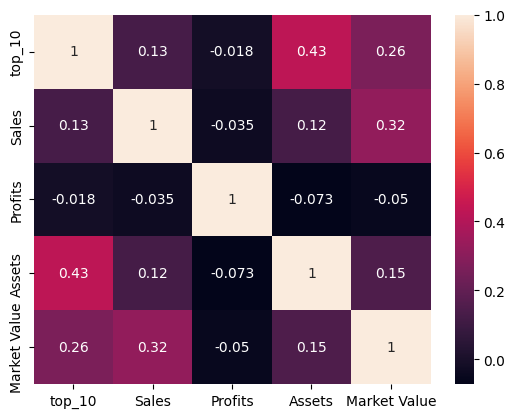

In [52]:
sns.heatmap(df_master_numbers.corr(), annot = True, cmap = "rocket")

<Axes: >

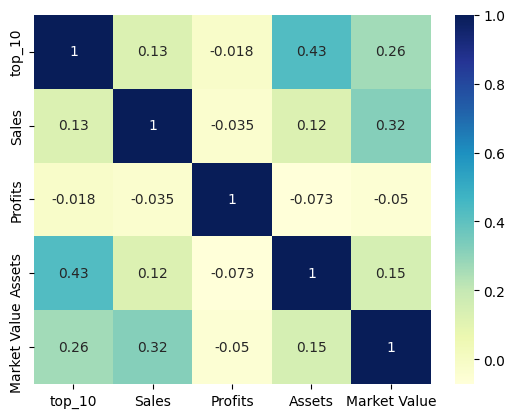

In [53]:
sns.heatmap(df_master_numbers.corr(), annot = True, cmap = "YlGnBu")

In [54]:
#In terms of placing in the top 10, Assets and Market Value seem to be the two most important factors, with Sales coming in at a close third
#Profits for some reason seem to actually have a negative correlation with placing in the top 10

In [101]:
#Want to make a Logistic Regression model with Assets, Market Value, and Sales
#Want to be Binary classification. (Will be top 10 or not? Binary)

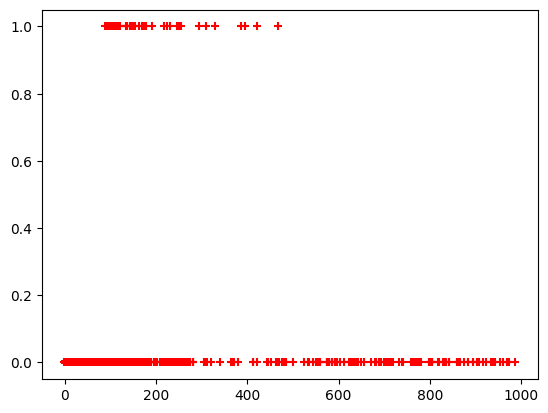

In [55]:
plt.scatter(df_master_numbers.Sales, df_master_numbers.top_10, marker='+', color = 'red')

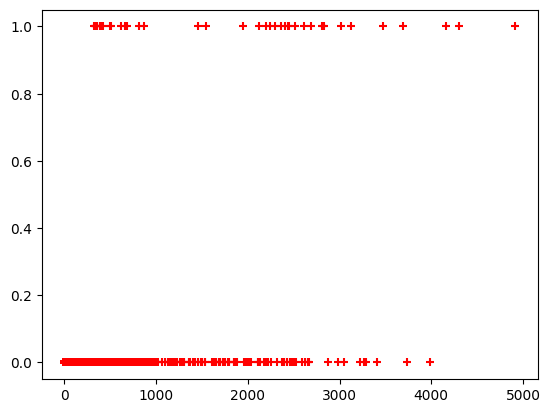

In [56]:
plt.scatter(df_master_numbers.Assets, df_master_numbers.top_10, marker='+', color = 'red')

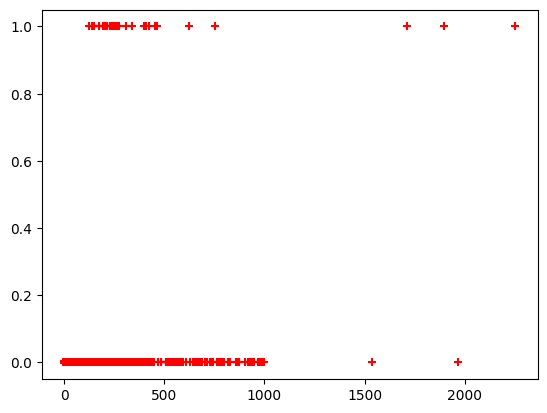

In [57]:
plt.scatter(df_master_numbers["Market Value"], df_master_numbers.top_10, marker='+', color = 'red')

In [151]:
#Now we can create a model trained on this database
X_train, X_test, y_train, y_test = train_test_split(df_master_numbers[['Sales','Assets', 'Market Value']],df_master_numbers.top_10,test_size=0.2)

In [152]:
X_train

,Sales,Assets,Market Value
1121,20.0,29.5,2.7
712,25.2,24.2,12.0
1314,10.1,11.4,10.9
282,12.3,16.2,4.1
491,13.5,14.8,77.5
...,...,...,...
809,3.2,39.6,18.3
1405,1.5,34.4,5.0
1158,4.3,70.3,9.5
1803,15.4,12.0,17.4


In [153]:
X_test

,Sales,Assets,Market Value
51,8.3,11.6,10.7
540,16.4,27.2,5.5
828,2.4,73.4,14.2
1723,3.1,29.3,6.4
929,1.5,26.3,4.6
...,...,...,...
1212,2.0,10.5,9.3
263,3.7,14.5,5.5
829,20.8,25.6,7.5
287,16.5,431.9,16.4


In [154]:
model = LogisticRegression()

In [155]:
model.fit(X_train, y_train)

LogisticRegression()

In [156]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
#Accuracy has a lot of leeway, anything above 0.95 is still statistically significant!
model.score(X_test, y_test)

0.9964806435394671

In [158]:
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1976,    4],
       [   3,    6]])

Text(50.722222222222214, 0.5, 'Truth')

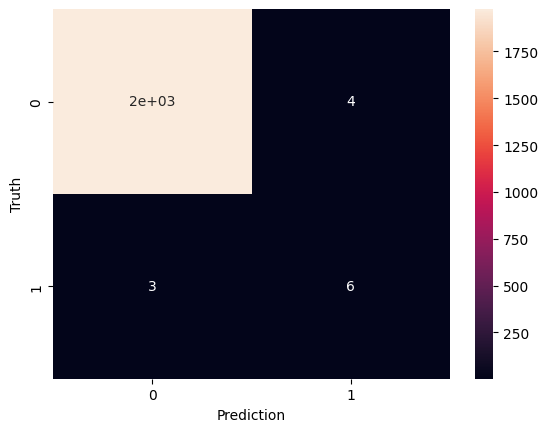

In [159]:
#What really matters here is that the model actually does have mistakes
#Why do we want it to have mistakes? To prove that it's actually learning, a model can't learn anything without mistakes
sns.heatmap(cm, annot= True)
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [166]:
#Now, we have to go back to the 2023 data and alter it in a manner that can be used for prediction
df_global_2000_2023_predict = df_global_2000_2023.drop("Company", axis = 1)
df_global_2000_2023_predict = df_global_2000_2023_predict.drop("Country", axis = 1)
df_global_2000_2023_predict = df_global_2000_2023_predict.drop("publish_year", axis = 1)
df_global_2000_2023_predict = df_global_2000_2023_predict.drop("Rank", axis = 1)
df_global_2000_2023_predict = df_global_2000_2023_predict.drop("Profits", axis = 1)
df_global_2000_2023_predict = df_global_2000_2023_predict.drop("top_10", axis = 1)
df_global_2000_2023_predict

,Sales,Assets,Market Value
0,179.930,3744.30,399.59
1,589.470,660.99,2055.22
2,216.770,6116.82,203.01
3,203.080,4977.48,172.99
4,186.140,5356.86,141.82
...,...,...,...
1995,5.350,7.82,15.60
1996,15.620,11.39,3.17
1997,3.340,43.22,5.60
1998,0.556,42.97,2.49


In [186]:
model.predict(df_global_2000_2023_predict)

array([1, 1, 1, ..., 0, 0, 0])

In [187]:
model.predict_proba(df_global_2000_2023_predict)

array([[2.26543793e-02, 9.77345621e-01],
       [3.86374557e-03, 9.96136254e-01],
       [1.85900291e-04, 9.99814100e-01],
       ...,
       [9.99408619e-01, 5.91380968e-04],
       [9.99422838e-01, 5.77161779e-04],
       [9.99447039e-01, 5.52961077e-04]])

In [188]:
#Now we can get the predictions from the 2023 data and the probabilities of those predictions
predictions = np.array(model.predict(df_global_2000_2023_predict))
prediction_probabilities = np.array(model.predict_proba(df_global_2000_2023_predict))

In [189]:
indices_of_ones = np.where(predictions == 1)
count_of_ones = len(indices_of_ones[0])
#Here we can see how many companies are predicted to be within the top 10
print(count_of_ones)
#Here we can see were those companies are in the 2023 database
print(indices_of_ones[0])

15
[  0   1   2   3   4   5   6   8   9  11  19  35  90 349 366]


In [190]:
#We can then see the exact probabilities of these companies actually being in the top 10
print(prediction_probabilities[0])
print(prediction_probabilities[1])
print(prediction_probabilities[2])
print(prediction_probabilities[3])
print(prediction_probabilities[4])
print(prediction_probabilities[5])
print(prediction_probabilities[6])
print(prediction_probabilities[8])
print(prediction_probabilities[9])
print(prediction_probabilities[11])
print(prediction_probabilities[19])
print(prediction_probabilities[35])
print(prediction_probabilities[90])
print(prediction_probabilities[349])
print(prediction_probabilities[366])

[0.02265438 0.97734562]
[0.00386375 0.99613625]
[1.85900291e-04 9.99814100e-01]
[0.00331976 0.99668024]
[0.00165589 0.99834411]
[0.18636298 0.81363702]
[0.37626197 0.62373803]
[0.00807397 0.99192603]
[6.58467535e-04 9.99341532e-01]
[0.01791835 0.98208165]
[0.38595366 0.61404634]
[0.41729823 0.58270177]
[0.49598613 0.50401387]
[0.04404179 0.95595821]
[0.40830593 0.59169407]


In [204]:
df_global_2000_2023.iloc[[0,1,2,3,4,5,6,8,9,11,19,35,90,349,366]]

,Rank,Company,Country,Sales,Profits,Assets,Market Value,publish_year,top_10
0,1,JPMorgan Chase,United States,179.93,41.80,3744.30,399.590,2023,1
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47,156.36,660.99,2055.220,2023,1
2,3,ICBC,China,216.77,52.47,6116.82,203.010,2023,1
3,4,China Construction Bank,China,203.08,48.25,4977.48,172.990,2023,1
4,5,Agricultural Bank of China,China,186.14,37.92,5356.86,141.820,2023,1
5,6,Bank of America,United States,133.84,28.62,3194.66,220.820,2023,1
6,7,Alphabet,United States,282.85,58.59,369.49,1340.530,2023,1
8,9,Microsoft,United States,207.59,69.02,380.09,2309.840,2023,1
9,10,Apple,United States,385.10,94.32,332.16,2746.210,2023,1
11,12,Bank of China,China,158.23,33.23,4421.76,122.670,2023,0


In [211]:
#Now that we have the probabilities all in order, we can make a dataframe of them
df_most_likely_2024 = pd.DataFrame({'Company': ['JPMorgan Chase', 'Saudi Arabian Oil Company (Saudi Aramco)', 'ICBC', 'China Construction Bank', 'Agricultural Bank of China', 'Bank of America', 'Alphabet', 'Microsoft', 'Apple', 'Bank of China', 'HSBC Holdings', 'Amazon', 'Mitsubishi UFJ Financial', 'Fannie Mae', 'Freddie Mac'],
                                    'Probability': [0.97734562, 0.99613625, 0.99981410, 0.99668024, 0.99834411, 0.81363702, 0.62373803, 0.99192603, 0.99934153, 0.98208165, 0.61404634, 0.58270177, 0.50401387, 0.95595821, 0.59169407]
                                   })
df_most_likely_2024 = df_most_likely_2024.sort_values(by = 'Probability', ascending = False) 
df_most_likely_2024

,Company,Probability
2,ICBC,0.999814
8,Apple,0.999342
4,Agricultural Bank of China,0.998344
3,China Construction Bank,0.996680
1,Saudi Arabian Oil Company (Saudi Aramco),0.996136
7,Microsoft,0.991926
9,Bank of China,0.982082
0,JPMorgan Chase,0.977346
13,Fannie Mae,0.955958
5,Bank of America,0.813637


In [213]:
#In conclusion:
#The above database shows the 15 companies most likely to be among the top 10 Forbes Global 2000 in 2024 and the probabilities that each company places in the top 10